In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img_width, img_height = 150, 150
batch_size=16

In [4]:
# Load the saved model
test_model = tf.keras.models.load_model('baselineCNN-model.keras')
print('model loaded')

model loaded


In [5]:
# Load test dataset
test_dir = 'data3a/test'

In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255
   )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 150 images belonging to 3 classes.


5/5 [==============================] - 1s 108ms/step
Confusion Matrix:


C:\Users\sandi\AppData\Local\Temp\ipykernel_17004\1241335800.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
C:\Users\sandi\AppData\Local\Temp\ipykernel_17004\1241335800.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual


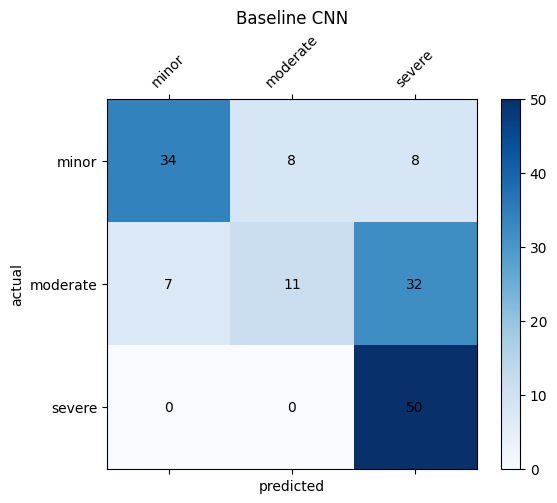

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.83      0.68      0.75        50
 02-moderate       0.58      0.22      0.32        50
   03-severe       0.56      1.00      0.71        50

    accuracy                           0.63       150
   macro avg       0.65      0.63      0.59       150
weighted avg       0.65      0.63      0.59       150



In [8]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels = [], []
class_names = sorted(test_generator.class_indices.keys())
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    test_images.extend(images)
    test_labels.extend(np.argmax(labels, axis=1))


test_images = np.array(test_images)
test_labels = np.array(test_labels)

predictions = test_model.predict(test_images)

from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = test_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Blues')

cbar = fig.colorbar(cax)

ax.set_title('Baseline CNN')

ax.set_xlabel('predicted') #predicted
ax.set_ylabel('actual') #actual

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()


report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [ ]:
test_dir = 'data3a/test'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(test_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = test_model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))